# Principal Component Analysis

## Summary
- StandardScalers
- Principal Components 

### Setup Dependencies

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
item_data = pd.read_csv('data/item_data.csv', index_col=0)

In [3]:
item_data.shape

(414, 2574)

### Toy example: oval blob

In [4]:
np.random.seed(101)

x1 = np.random.normal(0,1,100)
x2 = x1 + np.random.normal(0,1,100)

In [5]:
X = np.stack([x1, x2], axis=1)
X.shape

(100, 2)

In [6]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 2.45737416,  2.76968241],
       [ 0.44665735, -0.38363275],
       [ 0.71733989, -0.37695455],
       [ 0.3264168 , -0.60579169],
       [ 0.46889068,  0.39146426]])

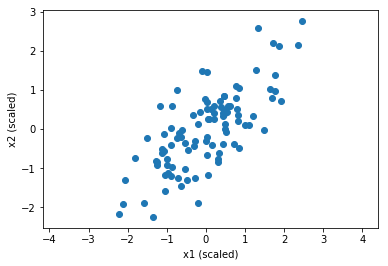

In [7]:
plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.axis('equal')

plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')

plt.show()

### Principal Components

In [8]:
pca = PCA()

pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

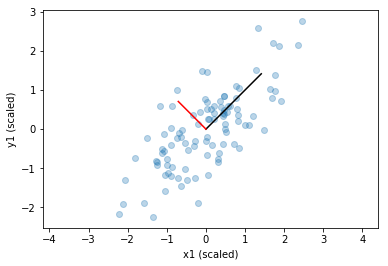

In [10]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], alpha=0.3)

plt.plot([0, 2*pca.components_[0,0]], [0,2*pca.components_[0,1]], 'k')

plt.plot ([0, pca.components_[1,0]], [0, pca.components_[1,1]],'r')

plt.axis('equal')
plt.xlabel('x1 (scaled)')
plt.ylabel('y1 (scaled)')

plt.show()

In [11]:
### Transform our original 

In [12]:
PC = pca.transform(X_scaled)
PC

array([[ 3.69608715,  0.22083528],
       [ 0.04456512, -0.58710376],
       [ 0.24068878, -0.77378302],
       [-0.19754788, -0.65917095],
       [ 0.60836281, -0.05474875],
       [-0.71622501, -0.05182778],
       [-1.49075894, -0.10304543],
       [ 0.58856263, -0.01278239],
       [-2.84995071,  0.1383902 ],
       [ 0.80906979,  0.02420498],
       [ 0.75012665,  0.25432158],
       [-0.66833044,  0.3649792 ],
       [-0.44371345, -0.47425354],
       [-0.6110213 ,  0.65466425],
       [-1.15520984,  0.34899869],
       [ 1.32501463,  0.24613004],
       [ 0.51361362,  0.48020218],
       [ 1.93344859, -0.54580846],
       [ 3.19780987, -0.13943961],
       [ 0.29706017, -0.4103606 ],
       [ 0.46148845,  0.2750428 ],
       [ 1.03345039, -1.0558936 ],
       [-1.80321689,  0.75821074],
       [-1.47761898,  0.33558531],
       [-1.09288786, -0.68084655],
       [ 0.44495097,  0.13831388],
       [-0.21424021, -0.21497172],
       [ 1.03674771,  1.01194406],
       [ 0.86066398,

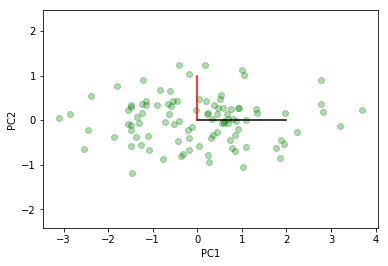

In [13]:
plt.scatter(PC[:,0], PC[:,1], alpha=0.3, color='g')
plt.plot([0,2], [0,0], 'k')
plt.plot([0,0], [0,1], 'r')
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

### Dimensionality Reduction

In [14]:
#pca = PCA()

In [18]:
pca.explained_variance_ratio_

array([0.86915841, 0.13084159])

In [20]:
pca = PCA(n_components=1)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
pca.components_

array([[0.70710678, 0.70710678]])

In [22]:
PC = pca.transform(X_scaled)
PC.shape

(100, 1)

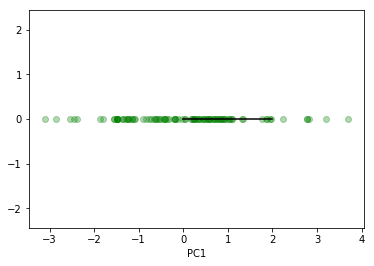

In [23]:
plt.scatter(PC[:,0], len(PC)*[0], alpha=0.3, color='g')
plt.plot([0,2],[0,0], 'k')
plt.axis('equal')
plt.xlabel('PC1')
plt.show()

### Item Data PCA

In [24]:
standard_scaler = StandardScaler()

item_data_scaled = scaler.fit_transform(item_data)
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

In [26]:
# Fit data in an instance of PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
PC_items = pca.transform(item_data_scaled)
PC_items[:5]

array([[ 5.87614052e+00,  4.82891689e+00, -4.95545069e-01, ...,
        -6.62646278e-04, -4.43629806e-05,  9.29811783e-15],
       [-4.21983747e+00,  1.22621722e+00, -1.88191211e+00, ...,
        -2.11471782e-04, -2.69154340e-04, -3.69756309e-15],
       [-1.26084676e+00,  2.38766371e+00, -7.31483440e-02, ...,
         2.57750179e-04, -2.05682324e-04, -5.93448901e-15],
       [-4.92931983e+00, -7.14858724e-01, -1.58093026e+00, ...,
        -1.98603886e-03,  9.92316312e-05, -8.44636860e-15],
       [-2.05311348e+00,  2.11095022e+00,  1.84807021e-01, ...,
        -3.43415269e-04, -1.32981672e-04,  5.55111512e-17]])

### Explained Variance

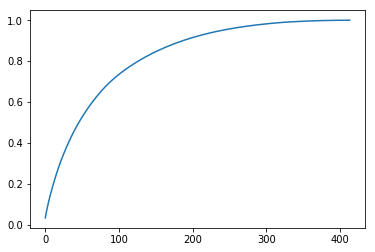

In [30]:
# calculate and cumulate explained variance
# tells total amount of variance we'd capture if we kept up to the n-th component
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [31]:
# How much variance we'd capture with the first 125 components
cumulative_explained_variance[124]

0.7955069032205401

In [32]:
#just take the first 125 elements
pca = PCA(n_components=125)

PC_items = pca.fit_transform(item_data_scaled)

PC_items.shape

(414, 125)

In [33]:
items_pca = pd.DataFrame(PC_items)

# Name columns
items_pca.columns = ['PC{}'.format(i+1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828892,-0.495543,3.093843,-0.633702,-11.534085,2.161913,7.116797,5.336110,4.424089,...,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,-4.219839,1.226195,-1.881922,-0.174302,0.817768,1.160852,-0.871961,-0.846827,0.460120,0.854323,...,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,-1.260838,2.387828,-0.073097,-1.118903,-0.034546,-3.715325,-0.342738,-0.149002,-0.789685,-0.377883,...,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,-4.929319,-0.714874,-1.581119,-0.469789,-0.116164,0.647736,0.112682,-1.336327,1.547287,-1.190830,...,-1.869817,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232
12352,-2.053129,2.110788,0.184844,0.128379,0.087133,-1.943497,2.383475,0.898283,-0.672848,0.081181,...,1.695937,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235


In [34]:
items_pca.to_csv('pca_item_data.csv')